<B>An Investigation of Seismicity at "Earthquake Fault" Tourist Stop at Inyo National Forest and Seismogram Processing</B>


<body>By Masooma Hasnain</body><br>
<small>Final Project for Incorporated Research Institutions for Seismology: Seismology Skill Building Workshop Summer 2020</small>


<p style="margin-left: 40px"><strong>Location:</strong> "Earthquake Fault" in Inyo National Forest</p>
<p style="margin-left: 40px"><strong>Background:</strong> In Inyo National Forest, there is a stop on the side of the road dubbed as "Earthquake Fault," after preliminary research, a more accurate name for the fracture would be a fissure. The cause of this fissure is attributed to the Inyo-Mono Crater eruptions, but the exact origin is unknown. The age of the fissure is undetermined.</p> 
<p style="margin-left: 40px"><strong>Reasoning for Location:</strong> Even though this fissure isn't an earthquake fault, I am interested in the location's recent seismicity.</p>

<img src=https://media.cincopa.com/v2/670604/4433!E23CAwB-QDATyA/1/069_02_Destinations_2011_08_18_0002.jpg>

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import numpy as np
client = Client("IRIS")
from obspy.signal.trigger import recursive_sta_lta
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import trigger_onset
from obspy.signal.trigger import trigger_onset
from obspy.signal.cross_correlation import correlation_detector
#for loading libraries

In [31]:
#search parameters
startt=UTCDateTime("2000-09-15")
endt=UTCDateTime("2020-09-15")
maxrad=1.0
minmag=4.
lat = 37.6539
lon = -118.9998

In [32]:
#catalog request
#Warning: May take a few minutes if number of events is large
cat=client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")
print(cat)

20 Event(s) in Catalog:
2014-05-30T07:48:33.910000Z | +38.392, -119.391 | 4.0 mb
2013-10-21T17:04:11.250000Z | +37.515, -118.824 | 4.0 ML
...
2004-09-18T23:43:41.470000Z | +37.962, -118.621 | 5.4 MW
2004-09-18T23:02:18.090000Z | +37.956, -118.677 | 5.4 MW
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In the twenty years between 9/15/2000 and 9/15/2020, there have been 20 earthquakes with a magnitude of at least 4.0 in a 110 km radius to "Earthquake Fault" in Inyo National Forest, a 7,702.71 km<sup>2</sup> area forest.

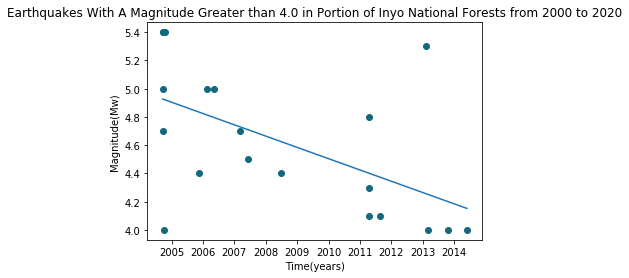

In [33]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
    
#convert to matplotlib number format
mtimes=mdates.date2num(times)
#plot to show magnitude of earthquakes in catalog over time
fig1=plt.subplots(1,1)
plt.plot_date(mtimes, mags, marker='o', color ="#14687d")
plt.title('Earthquakes With A Magnitude Greater than 4.0 in Portion of Inyo National Forests from 2000 to 2020')
plt.xlabel('Time(years)')
plt.ylabel('Magnitude(Mw)')
x = np.array(mtimes)
y= np.array(mags)
m, b = np.polyfit (x, y, 1) #line of best fit
plt.plot(x, m*x +b)
plt.show()

In [34]:
#comparison with area that is known to be seismically active
#search parameters
starttt=UTCDateTime("2000-09-15")
endt2=UTCDateTime("2020-09-15")
maxrad2=1.0
minmag2=4.0
lat2 = 34.0522
lon2 = -118.2437 #Los Angeles
cat2=client.get_events(starttime=starttt, endtime=endt2, latitude=lat2, longitude=lon2, maxradius=maxrad2, minmagnitude=minmag2, catalog="ISC")
print(cat2)
times2 = []
mags2 = []
for event in cat2:
    times2.append(event.origins[0].time.datetime)
    mags2.append(event.magnitudes[0].mag)

28 Event(s) in Catalog:
2015-01-04T03:18:09.620000Z | +34.608, -118.625 | 4.2 mb
2014-12-30T23:26:17.810000Z | +33.576, -118.276 | 4.0 ML
...
2001-09-09T23:59:17.360000Z | +34.041, -118.492 | 4.2 mb
2001-01-14T02:26:12.200000Z | +34.236, -118.512 | 4.0 mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


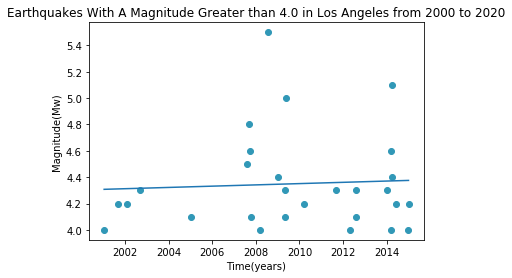

In [35]:
#convert to matplotlib number format
mtimess=mdates.date2num(times2)
#plot to show magnitude of earthquakes in catalog over time
fig5=plt.subplots(1,1)
plt.plot_date(mtimess, mags2, marker='o', color="#3198b7")
plt.title('Earthquakes With A Magnitude Greater than 4.0 in Los Angeles from 2000 to 2020')
plt.xlabel('Time(years)')
plt.ylabel('Magnitude(Mw)')
x = np.array(mtimess)
y= np.array(mags2)
m, b = np.polyfit (x, y, 1) #line of best fit
plt.plot(x, m*x +b)
plt.show()

In the twenty years between 9/15/2000 and 9/15/2020, there have been 28 earthquakes with a magnitude of at least 4.0 in a 110 km radius from the center of Los Angeles.

[]

<Figure size 1600x800 with 0 Axes>

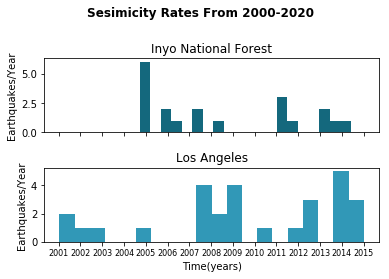

In [36]:
from matplotlib.pyplot import figure
figure(num = None, figsize = (20,10), dpi=80, facecolor ='w', edgecolor ='k')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(top=0.88)
plt.tight_layout(pad=3.0)

ax1.hist(mtimes, bins=20, color ="#14687d")
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.subplots_adjust(top=0.8)
fig.suptitle('Sesimicity Rates From 2000-2020',fontweight="bold")
ax1.set_title('Inyo National Forest')
ax1.set_ylabel('Earthquakes/Year')
ax1.plot()

ax2.hist(mtimess, bins=20, color="#3198b7")
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Los Angeles')
ax2.set_xlabel('Time(years)')
ax2.set_ylabel('Earthquakes/Year')
plt.tick_params(axis='x', which='major', labelsize=8)
ax2.plot()


<strong>Comparison of Seismicity in "Earthquake Fault" in Inyo National Forest To The Greater Los Angeles Area:</strong>
<p style="margin-left: 40px">Inyo National Forest has a lower rate of seismicity compared to that of the Greater Los Angelest Area over Sept 2000- Sept 2020. This can be attributed to to location of the nearby fault zones. Inyo National Forests is located on the Eastern California Shear Zone, which extends into western Nevada. </p>
<p style="margin-left: 40px"> Los Angeles is known for its seismic activity due to its proximity to faults such as the Palos Verdes fault, Compton blind-thrust fault, Puente Hills blind thrust fault, and Sierra Madre faults. The higher seismic activity is easily seen by comparing Los Angeles' seismicity to other locations such as the Inyo National Forest. Recently, on Sept. 18th, 2020, there was a 4.5 Mw earthquake attributed to the Puente Hills blind thrust fault, which Los Angeles lies on top on.</p>

<strong>Seismogram Processing from 4.5 Earthquake Felt in Los Angeles on 9/18/2020</strong>
<body>The earthquake's epicenter was outside of South El Monte, outside of the city of Los Angeles. The hypocenter was 18 kilometers, approximately 11 miles deep.

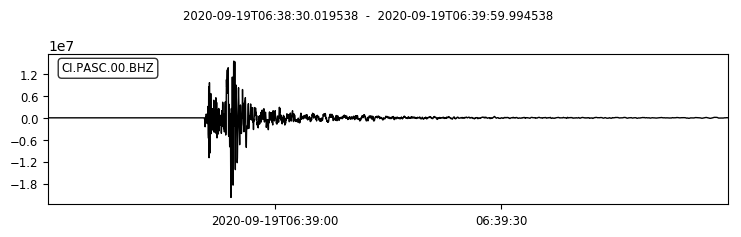

Unfiltered seismogram recorded by the Art Center College of Design in California, 0.16 degrees away from the epicenter of the earthquake on 9/18/2020 PST.


In [37]:
#Most Recent 4.0+ Earthquake in Los Angeles
client = Client("IRIS") 
network = "CI"
channel = "BHZ"
location ="00"
station="PASC"
startt= UTCDateTime("2020-09-19T06:38:30")
endt = UTCDateTime("2020-09-19T06:40:00")


st=client.get_waveforms(network,station,location, channel, startt, endt)
tr = st[0]
fig = tr.plot()
print("Unfiltered seismogram recorded by the Art Center College of Design in California, 0.16 degrees away from the epicenter of the earthquake on 9/18/2020 PST.")

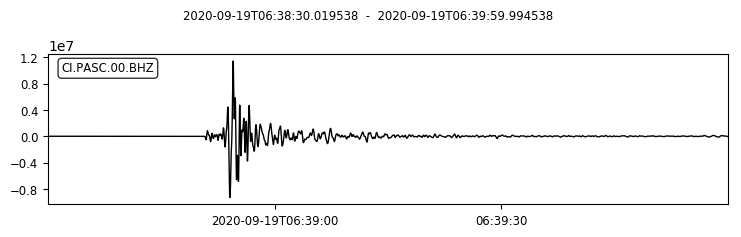

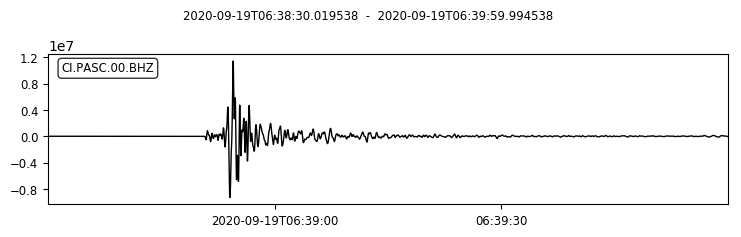

In [38]:
#filtering
st.filter('bandpass', freqmin = 0.5, freqmax=3);
tr=st[0]
tr.plot()

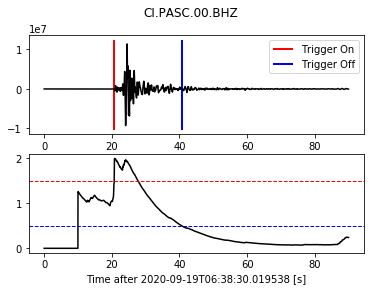

In [39]:
#auto-picking
samprate = tr.stats.sampling_rate;
cf = recursive_sta_lta(tr, int(5*samprate), int(10*samprate));
fig = plot_trigger(tr, cf, 1.5, 0.5);

In [40]:
trig = trigger_onset(cf, 1.2, 0.5)/samprate
arrival = trig[0][0]
pick = tr.stats.starttime + arrival
print("Calculated P wave:")
print(pick)

Calculated P wave:
2020-09-19T06:38:40.019538Z


<b>Estimation of P wave arrival</b>

The estimated P wave arrival for the El Monte Earthquake was at Sept 19, 2020 at 6:38:40 UTC

<b>Notes:</b>
Although this earthquake was 4.5 Mw and not considered a strong earthquake, it serves to show to always be prepared for earthquakes, especially if you live in an location that has high seismicity rates. Earthquakes can happen at anytime, but with safety protocols and protective building standards, we can minimize harm.